Importing all Required libraries

Setting the path for reading the Train set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime as dt
%matplotlib inline

In [2]:
os.getcwd()
os.chdir('C:\\Users\madhu\Verizon\FullDataSet')

Reading the Train datset and displaying first 5 obs

In [19]:
vertrain=pd.read_csv('training_data.csv')
vertrain.head(5)

,id,ad,link,timestamp,checkout,order_placed,grp,funnel_level
0,session446676598812,ad412316860435,link1288490188810,2018-04-30T14:39:22.000-04:00,1,1,grp936302870529,lower
1,session60129542152,ad584115552306,link1288490188810,2018-04-30T08:39:23.000-04:00,1,1,grp936302870529,lower
2,session1511828488251,ad1056561954841,link1288490188810,2018-04-30T17:24:01.000-04:00,1,1,grp936302870529,lower
3,session1142461300754,ad1666447310876,link1288490188810,2018-04-30T10:42:57.000-04:00,1,1,grp936302870529,lower
4,session1142461300754,ad1666447310876,link1288490188810,2018-04-30T10:43:19.000-04:00,1,1,grp936302870529,lower


Verifying the full dataset columns datatypes 

In [4]:
vertrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199410 entries, 0 to 199409
Data columns (total 8 columns):
id              199410 non-null object
ad              120035 non-null object
link            199410 non-null object
timestamp       199410 non-null object
checkout        199410 non-null int64
order_placed    199410 non-null int64
grp             199410 non-null object
funnel_level    199410 non-null object
dtypes: int64(2), object(6)
memory usage: 12.2+ MB


Frequency of checkout w.r.t order placed(0/1)

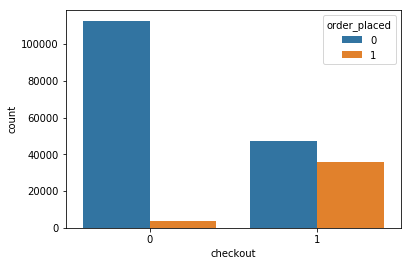

In [5]:
import seaborn as sns
sns.countplot(vertrain['checkout'],hue=vertrain['order_placed'])

Frequency of order placed w.r.t funnel level

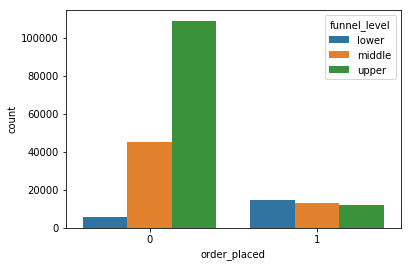

In [6]:
sns.countplot(vertrain['order_placed'],hue=vertrain['funnel_level'])

Splitting the data of train set to 2 categories i.e. ad with null and ad without any missing data

In [20]:
adnull=vertrain[vertrain.ad.isnull()]
adnull.head()

,id,ad,link,timestamp,checkout,order_placed,grp,funnel_level
797,session730144440347,NaN,link1288490188805,2018-04-30T12:42:52.000-04:00,1,0,grp627065225216,upper
878,session66,NaN,link1288490188816,2018-04-30T19:46:38.000-04:00,0,0,grp1340029796352,upper
879,session35,NaN,link1288490188816,2018-04-30T13:42:06.000-04:00,0,0,grp1340029796352,upper
880,session57,NaN,link1288490188816,2018-04-30T18:19:18.000-04:00,1,0,grp1340029796352,upper
881,session67,NaN,link1288490188816,2018-04-30T19:54:48.000-04:00,1,1,grp1340029796352,upper


In [21]:
adnotnull=vertrain[vertrain.ad.notnull()]
adnotnull.head()

,id,ad,link,timestamp,checkout,order_placed,grp,funnel_level
0,session446676598812,ad412316860435,link1288490188810,2018-04-30T14:39:22.000-04:00,1,1,grp936302870529,lower
1,session60129542152,ad584115552306,link1288490188810,2018-04-30T08:39:23.000-04:00,1,1,grp936302870529,lower
2,session1511828488251,ad1056561954841,link1288490188810,2018-04-30T17:24:01.000-04:00,1,1,grp936302870529,lower
3,session1142461300754,ad1666447310876,link1288490188810,2018-04-30T10:42:57.000-04:00,1,1,grp936302870529,lower
4,session1142461300754,ad1666447310876,link1288490188810,2018-04-30T10:43:19.000-04:00,1,1,grp936302870529,lower


Here group by id(i.e. session) for non null ad data and getting unique id and ad.Using these details I am trying to fill the null ad data with the unique ad received from non null ad file for the same session.All other will be retained as NaNs

In [22]:
adnull_t1=adnotnull.groupby(['id','ad'])[['id','ad']].head()
adnull_t2=adnull_t1.sort_values(by=['id']).groupby(adnull_t1.id).first()[['ad']].reset_index()
adnull_fin=pd.merge(adnull,adnull_t2,on='id',how='left')
adnull_fin['ad']=adnull_fin['ad_y']
adnull_fin.drop(['ad_x','ad_y'],axis=1,inplace=True)
adnull_fin.head()

,id,link,timestamp,checkout,order_placed,grp,funnel_level,ad
0,session730144440347,link1288490188805,2018-04-30T12:42:52.000-04:00,1,0,grp627065225216,upper,ad1219770712094
1,session66,link1288490188816,2018-04-30T19:46:38.000-04:00,0,0,grp1340029796352,upper,NaN
2,session35,link1288490188816,2018-04-30T13:42:06.000-04:00,0,0,grp1340029796352,upper,ad566935683078
3,session57,link1288490188816,2018-04-30T18:19:18.000-04:00,1,0,grp1340029796352,upper,ad1340029796357
4,session67,link1288490188816,2018-04-30T19:54:48.000-04:00,1,1,grp1340029796352,upper,ad1365799600132


Now combine non null ad and null data data.

In [23]:
vertrn=pd.concat([adnotnull,adnull_fin])
vertrn.head()

C:\Users\madhu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,ad,checkout,funnel_level,grp,id,link,order_placed,timestamp
0,ad412316860435,1,lower,grp936302870529,session446676598812,link1288490188810,1,2018-04-30T14:39:22.000-04:00
1,ad584115552306,1,lower,grp936302870529,session60129542152,link1288490188810,1,2018-04-30T08:39:23.000-04:00
2,ad1056561954841,1,lower,grp936302870529,session1511828488251,link1288490188810,1,2018-04-30T17:24:01.000-04:00
3,ad1666447310876,1,lower,grp936302870529,session1142461300754,link1288490188810,1,2018-04-30T10:42:57.000-04:00
4,ad1666447310876,1,lower,grp936302870529,session1142461300754,link1288490188810,1,2018-04-30T10:43:19.000-04:00


Data correction of other fields follows here:funnel_level is categorized as 0/1 

In [24]:
vertrn=pd.concat([vertrn,pd.get_dummies(vertrn['funnel_level'],prefix='funel')],axis=1)
vertrn.head()

,ad,checkout,funnel_level,grp,id,link,order_placed,timestamp,funel_lower,funel_middle,funel_upper
0,ad412316860435,1,lower,grp936302870529,session446676598812,link1288490188810,1,2018-04-30T14:39:22.000-04:00,1,0,0
1,ad584115552306,1,lower,grp936302870529,session60129542152,link1288490188810,1,2018-04-30T08:39:23.000-04:00,1,0,0
2,ad1056561954841,1,lower,grp936302870529,session1511828488251,link1288490188810,1,2018-04-30T17:24:01.000-04:00,1,0,0
3,ad1666447310876,1,lower,grp936302870529,session1142461300754,link1288490188810,1,2018-04-30T10:42:57.000-04:00,1,0,0
4,ad1666447310876,1,lower,grp936302870529,session1142461300754,link1288490188810,1,2018-04-30T10:43:19.000-04:00,1,0,0


Create a new variable session out of id

In [25]:
vertrn['session']=[x[7:] for x in vertrn['id']]

Create a new variable ad_1 out of ad and fill with 0 for all Nan

In [26]:
vertrn['ad_1']=[x[2:] if x[0:2]=='ad' else 0 for x in vertrn['ad'].astype('str').replace(" ","")]

Create a link_1 out of link

In [27]:
vertrn['link_1']=[x[4:] for x in vertrn['link']]

Create date/time/hours from Timestamp

In [28]:
vertrn['date']=[b[0:10].replace("-","") for b in vertrn['timestamp']]
vertrn['time']=[j[11:19].replace(":","") for j in vertrn['timestamp']]
vertrn['hours']=[l[20:29].replace("-","").replace(":","") for l in vertrn['timestamp']]
vertrn['date'].astype(int).head(5)
vertrn['time'].astype(int).head(2)
vertrn['hours'].astype(int).head(5)

0    400
1    400
2    400
3    400
4    400
Name: hours, dtype: int32

Create grp_1 from grp

In [29]:
vertrn['grp_1']=[x[3:] for x in vertrn['grp'].replace(" ","")]

Once data is cleaned up trying to see the first 5 obs

In [30]:
vertrn.head()

,ad,checkout,funnel_level,grp,id,link,order_placed,timestamp,funel_lower,funel_middle,funel_upper,session,ad_1,link_1,date,time,hours,grp_1
0,ad412316860435,1,lower,grp936302870529,session446676598812,link1288490188810,1,2018-04-30T14:39:22.000-04:00,1,0,0,446676598812,412316860435,1288490188810,20180430,143922,0000400,936302870529
1,ad584115552306,1,lower,grp936302870529,session60129542152,link1288490188810,1,2018-04-30T08:39:23.000-04:00,1,0,0,60129542152,584115552306,1288490188810,20180430,083923,0000400,936302870529
2,ad1056561954841,1,lower,grp936302870529,session1511828488251,link1288490188810,1,2018-04-30T17:24:01.000-04:00,1,0,0,1511828488251,1056561954841,1288490188810,20180430,172401,0000400,936302870529
3,ad1666447310876,1,lower,grp936302870529,session1142461300754,link1288490188810,1,2018-04-30T10:42:57.000-04:00,1,0,0,1142461300754,1666447310876,1288490188810,20180430,104257,0000400,936302870529
4,ad1666447310876,1,lower,grp936302870529,session1142461300754,link1288490188810,1,2018-04-30T10:43:19.000-04:00,1,0,0,1142461300754,1666447310876,1288490188810,20180430,104319,0000400,936302870529


Features Selection

In [31]:
ver=vertrn
ver['session']=ver['session'].astype('float')
ver['link_1']=ver['link_1'].astype('float')
ver['time']=ver['time'].astype('float')
X=ver[['session','link_1','funel_lower','funel_upper','time']]

Label selection

In [32]:
y=vertrn['order_placed']

Training the model with Logistic and finding the accuracy thru confusion matrix and classification report

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=29)
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
pd=lr.predict(X_test)

In [34]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,pd))
print(classification_report(y_test,pd))

[[48009     0]
 [11814     0]]
             precision    recall  f1-score   support

          0       0.80      1.00      0.89     48009
          1       0.00      0.00      0.00     11814

avg / total       0.64      0.80      0.71     59823



C:\Users\madhu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Training the model with Random Forest algo and verifying the accuracy

In [35]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(n_estimators=500,criterion='entropy',random_state=29)
RF.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=29, verbose=0, warm_start=False)

In [36]:
pdrf=RF.predict(X_test)

In [37]:
RF.feature_importances_

array([0.28407717, 0.14704829, 0.11635947, 0.0551308 , 0.39738427])

In [38]:
print(confusion_matrix(y_test,pdrf))
print(classification_report(y_test,pdrf))


[[46784  1225]
 [ 3775  8039]]
             precision    recall  f1-score   support

          0       0.93      0.97      0.95     48009
          1       0.87      0.68      0.76     11814

avg / total       0.91      0.92      0.91     59823



Training with XG Boost Classifier and verifying the accuracy

In [39]:
import xgboost as xgb
model=xgb.XGBClassifier(n_estimators=500) 
model.fit(X,y)
model.score(X,y)

C:\Users\madhu\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8566822125269545

Reading the test data

In [58]:
import pandas as pd
vertest=pd.read_csv('testing_data.csv')


Cleanign the ad field similarly as we did for train

In [59]:
adnull_tst=vertest[vertest.ad.isnull()]
adnotnull_tst=vertest[vertest.ad.notnull()]
adnotnull_tst1=adnotnull_tst.groupby(['id','ad'])[['id','ad']].head()
adnotnull_tst2=adnotnull_tst1.sort_values(by=['id']).groupby(adnotnull_tst1.id).first()[['ad']].reset_index()
adnull_fin=pd.merge(adnull_tst,adnotnull_tst2,on='id',how='left')
adnull_fin['ad']=adnull_fin['ad_y']
adnull_fin.drop(['ad_x','ad_y'],axis=1,inplace=True)
print(adnull_fin.info())
vertst=pd.concat([adnotnull_tst,adnull_fin])


<class 'pandas.core.frame.DataFrame'>
Int64Index: 19848 entries, 0 to 19847
Data columns (total 6 columns):
id              19848 non-null object
link            19848 non-null object
timestamp       19848 non-null object
grp             19848 non-null object
funnel_level    19848 non-null object
ad              14014 non-null object
dtypes: object(6)
memory usage: 1.1+ MB
None


C:\Users\madhu\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


Cleaning the other fields 

In [60]:
vertst['session']=[x[7:] for x in vertst['id']]
vertst['ad_1']=[x[2:] if x[0:2]=='ad' else 0 for x in vertst['ad'].astype('str').replace(" ","")]
vertst['link_1']=[x[4:] for x in vertst['link']]
vertst['date']=[b[0:10].replace("-","") for b in vertst['timestamp']]
vertst['time']=[j[11:19].replace(":","") for j in vertst['timestamp']]
vertst['hours']=[l[20:29].replace("-","").replace(":","") for l in vertst['timestamp']]
vertst['date'].astype(int).head(5)
vertst['time'].astype(int).head(2)
vertst['hours'].astype(int).head(5)
vertst['grp_1']=[x[3:] for x in vertst['grp'].replace(" ","")]
vertst=pd.concat([vertst,pd.get_dummies(vertst['funnel_level'],prefix='funel')],axis=1)

Verifying the complete dataset

In [61]:
vertst.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49414 entries, 0 to 19847
Data columns (total 16 columns):
ad              43580 non-null object
funnel_level    49414 non-null object
grp             49414 non-null object
id              49414 non-null object
link            49414 non-null object
timestamp       49414 non-null object
session         49414 non-null object
ad_1            49414 non-null object
link_1          49414 non-null object
date            49414 non-null object
time            49414 non-null object
hours           49414 non-null object
grp_1           49414 non-null object
funel_lower     49414 non-null uint8
funel_middle    49414 non-null uint8
funel_upper     49414 non-null uint8
dtypes: object(13), uint8(3)
memory usage: 5.4+ MB


Feature Selection

In [63]:
vert=vertst
vert['session']=vert['session'].astype('float')
vert['link_1']=vert['link_1'].astype('float')
vert['time']=vert['time'].astype('float')
XG=vert[['session','link_1','funel_lower','funel_upper','time']]

Predicting with XG Boost as it gave good accuracy

In [66]:
pdxgt=model.predict(XG)
vertst['order_placed']=pdxgt
final_data=vertst[['id','order_placed']]
final_data.to_csv('submission_file3.csv',index=False)

C:\Users\madhu\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
